<a href="https://colab.research.google.com/github/Emanuel3queijos/Emanuel3queijos/blob/master/Fatal_Encounters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install --upgrade plotly

## Import Statements

In [39]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [6]:
df_hh_income = pd.read_csv('/content/csvs/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('/content/csvs/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('/content/csvs/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('/content/csvs/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('/content/csvs/Deaths_by_Police_US.csv', encoding="windows-1252")

In [40]:

dataframes = {
    "Median Household Income": df_hh_income,
    "Poverty Rate": df_pct_poverty,
    "High School Completion Rate": df_pct_completed_hs,
    "Share of Race by City": df_share_race_city,
    "Fatalities by Police": df_fatalities
}

for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"NaN Values:\n{df.isnull().sum()}")
    print(f"Duplicate Rows: {df.duplicated().sum()}\n")
    print("------------------\n")



DataFrame: Median Household Income
Shape: (29322, 3)
Columns: ['Geographic Area', 'City', 'Median Income']
NaN Values:
Geographic Area     0
City                0
Median Income      51
dtype: int64
Duplicate Rows: 0

------------------

DataFrame: Poverty Rate
Shape: (29329, 3)
Columns: ['Geographic Area', 'City', 'poverty_rate']
NaN Values:
Geographic Area      0
City                 0
poverty_rate       201
dtype: int64
Duplicate Rows: 0

------------------

DataFrame: High School Completion Rate
Shape: (29329, 3)
Columns: ['Geographic Area', 'City', 'percent_completed_hs']
NaN Values:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Duplicate Rows: 0

------------------

DataFrame: Share of Race by City
Shape: (29268, 7)
Columns: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
NaN Values:
Geographic area          0
City                     0
share_white              0
share_

#heads


In [77]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


from matplotlib import pyplot as plt
df_pct_completed_hs['percent_completed_hs'].plot(kind='hist', bins=20, title='percent_completed_hs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_pct_completed_hs['percent_completed_hs'].plot(kind='line', figsize=(8, 4), title='percent_completed_hs')
plt.gca().spines[['top', 'right']].set_visible(False)

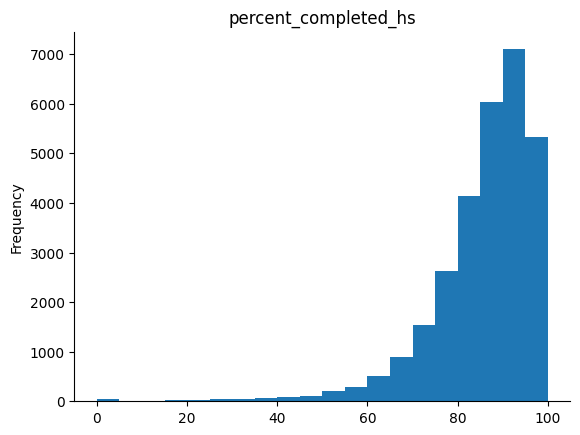

In [82]:
from matplotlib import pyplot as plt
df_pct_completed_hs['percent_completed_hs'].plot(kind='hist', bins=20, title='percent_completed_hs')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [72]:
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.80
1,AL,Abbeville city,29.10
2,AL,Adamsville city,25.50
3,AL,Addison town,30.70
4,AL,Akron town,42.00
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.60
29325,WY,Worland city,15.30
29326,WY,Wright town,5.90
29327,WY,Yoder town,5.40


In [15]:

df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [20]:

df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [22]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [41]:
missing_values = df_fatalities.isnull().sum()
print("Missing Values in Fatalities DataFrame:")
print(missing_values)
duplicate_rows = df_fatalities.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")
if duplicate_rows > 0:
    df_fatalities = df_fatalities.drop_duplicates()


Missing Values in Fatalities DataFrame:
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

Number of Duplicate Rows: 0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [74]:
import pandas as pd
import plotly.express as px

df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty = df_pct_poverty.dropna(subset=['poverty_rate'])
poverty_rate_by_state = df_pct_poverty.groupby('Geographic Area', as_index=False)['poverty_rate'].mean()
poverty_rate_sorted = poverty_rate_by_state.sort_values(by='poverty_rate', ascending=False)

fig = px.bar(poverty_rate_sorted,
             x='Geographic Area',
             y='poverty_rate',
             title='Poverty Rate by US State',
             labels={'Geographic Area': 'US State', 'poverty_rate': 'Poverty Rate (%)'},
             color='poverty_rate',
             color_continuous_scale='Viridis'  )

fig.update_layout(
    xaxis_tickangle=-45,
    width=1200,
    height=600
)

fig.show()

highest_poverty_state = poverty_rate_sorted.iloc[0]
lowest_poverty_state = poverty_rate_sorted.iloc[-1]

print(f"Highest poverty rate: {highest_poverty_state['Geographic Area']} with {highest_poverty_state['poverty_rate']}%")
print(f"Lowest poverty rate: {lowest_poverty_state['Geographic Area']} with {lowest_poverty_state['poverty_rate']}%")


Highest poverty rate: MS with 26.88425414364641%
Lowest poverty rate: NJ with 8.19097605893186%


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [87]:
import pandas as pd
import plotly.express as px
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

graduation_rate_by_state = df_pct_completed_hs.groupby('Geographic Area', as_index=False)['percent_completed_hs'].mean()
graduation_rate_sorted = graduation_rate_by_state.sort_values(by='percent_completed_hs', ascending=True)
fig = px.bar(graduation_rate_sorted,
             x='Geographic Area',
             y='percent_completed_hs',
             title='High School Graduation Rate by US State',
             labels={'Geographic Area': 'US State', 'percent_completed_hs': 'Graduation Rate (%)'},
             color='percent_completed_hs',
             color_continuous_scale='Blues'
             )
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(
    xaxis_tickangle=-45,
    width=1200,
    height=600
)

fig.show()
lowest_graduation_state = graduation_rate_sorted.iloc[0]
highest_graduation_state = graduation_rate_sorted.iloc[-1]
print(f"Lowest Graduation Rate: {lowest_graduation_state['Geographic Area']} with {lowest_graduation_state['percent_completed_hs']}%")
print(f"Highest Graduation Rate: {highest_graduation_state['Geographic Area']} with {highest_graduation_state['percent_completed_hs']}%")


Lowest Graduation Rate: TX with 75.69%
Highest Graduation Rate: MA with 92.40408163265306%


In [84]:
graduation_rate_by_state

,Geographic Area,percent_completed_hs
0,AK,84.63
1,AL,80.30
2,AR,79.95
3,AZ,80.47
4,CA,81.96
5,CO,90.11
6,CT,91.59
7,DC,89.30
8,DE,88.52
9,FL,85.74


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### line chart with two y-axes that show if the rations of poverty and high school graduation move together.  

In [92]:
import plotly.graph_objects as go

merged_df = pd.merge(poverty_rate_by_state, graduation_rate_by_state, on='Geographic Area')

fig = go.Figure()

fig.add_trace(go.Scatter(x=merged_df['Geographic Area'], y=merged_df['poverty_rate'],
                         mode='lines', name='Poverty Rate', line=dict(color='red')))

fig.add_trace(go.Scatter(x=merged_df['Geographic Area'], y=merged_df['percent_completed_hs'],
                         mode='lines', name='Graduation Rate', line=dict(color='blue'), yaxis='y2'))

fig.update_layout(
    title="Poverty Rate vs. High School Graduation Rate by US State",
    xaxis_title="US State",
    yaxis=dict(title="Poverty Rate (%)", titlefont=dict(color="red"), tickfont=dict(color="red")),
    yaxis2=dict(title="Graduation Rate (%)", titlefont=dict(color="blue"), tickfont=dict(color="blue"), overlaying='y', side='right'),
    xaxis_tickangle=-45
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1200,
    height=600
)


fig.show()


## Using Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

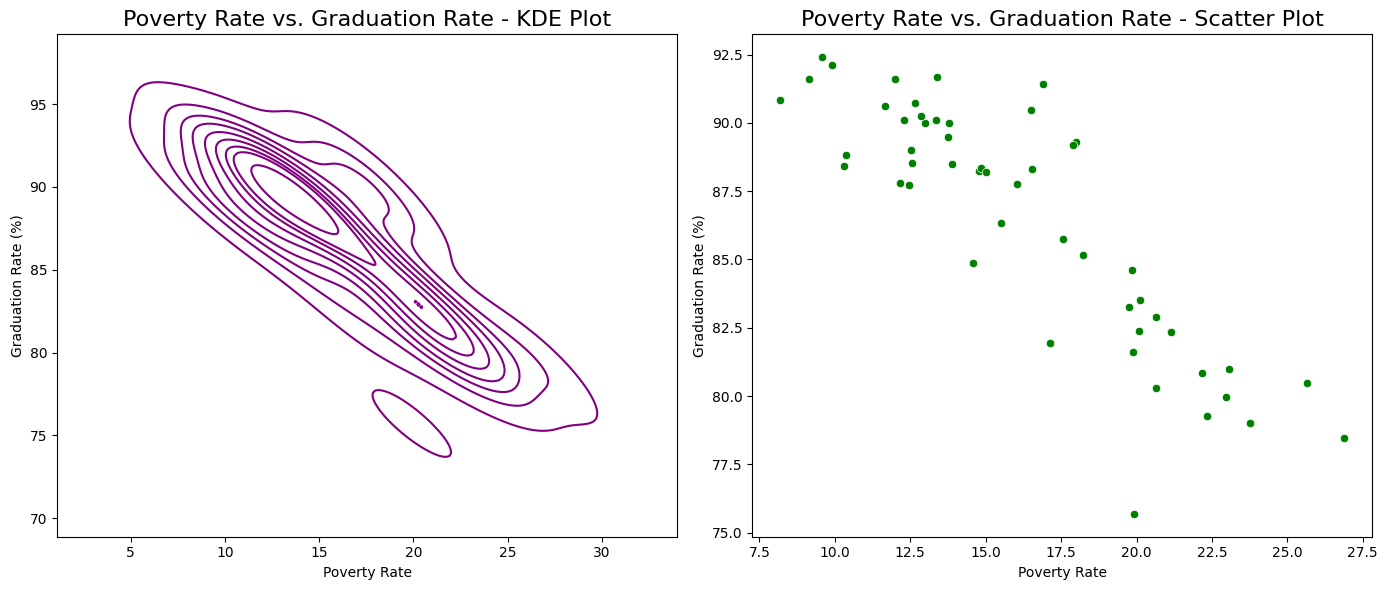

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(x='poverty_rate', y='percent_completed_hs', data=merged_df, ax=ax1, color='purple')
ax1.set_title("Poverty Rate vs. Graduation Rate - KDE Plot", fontsize=16)
ax1.set_xlabel("Poverty Rate")
ax1.set_ylabel("Graduation Rate (%)")

sns.scatterplot(x='poverty_rate', y='percent_completed_hs', data=merged_df, ax=ax2, color='green')
ax2.set_title("Poverty Rate vs. Graduation Rate - Scatter Plot", fontsize=16)
ax2.set_xlabel("Poverty Rate")
ax2.set_ylabel("Graduation Rate (%)")

plt.tight_layout()

plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

Create a seperate KDE plot for each race. Is there a difference between the distributions?

# Race of People Killed

Create a chart that shows the total number of people killed by race.

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).